Machine Learning to Analyze NIR Spectroscopy for MOE Predictability

## 1. Project Description

Near-Infrared Spectroscopy (NIR) is a process that utilizes various wavelengths of lights, as a non-destructive means, to support in the measurement of the modulus of elasticisty (MOE) in a sample. A breakdown of the project is as follows:

**Project Objective**
This study is to perform a regression analysis of the dataset of a for wavelength features and the output MOE, in order to determine if trends exist with the wavelengths to support the reduction of costs for NIR spectroscopy via machine learning. 

**Dataset Description**
This project will incorporate approximately 692 wavelength features (input X) as well as the MOE obtained through testing (output y).

**Algorithms & Methodology**
For the purposes of this assessment, it shall be broken into several major parts to conduct the various machine learning assessments. 

1. Import various libraries, data, and explore the incoming dataset to test for its completeness, observe general trends, and review conditions for any of the coming analyses.
   
2. Preprocess the dataset, which includes splitting the data into 80% for training and 20% for testing. In this part we shall remove any outliers and fill in for missing data using means imputation to fill that discrepancy.

3. Conduct basic machine learning algorithms, including Linear Regression, Polynomial Regression, and Support Vector Machine (SVM) Regression Analyses to first review any general trends and develop models. An Artificial Neural Network (ANN) analysis shall be performed, similarly to review trends and develop a model.

5. A Principal Component Analysis (PCA) shall be performed to reduce any dimensionality of the data, reducing the quantity of inputs to improve the efficiency of the analysis.

6. With the results of the PCA, the basic machine learning algorithms shall be repeated using the transformed and reduced inputs so as generate new results. Another ANN assessment shall then be performed again using the transformed values to produce new results.

7. Finally the results shall be compared to determine the best methodology.

# 2. Data Import

## 2.1 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## 2.2 Import the Dataset

In [3]:
dataset = pd.read_csv('Dataset.csv')

## 2.3 Exploration of the Raw Dataset

In [4]:
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X684,X685,X686,X687,X688,X689,X690,X691,X692,MOE
0,0.000068,0.000074,0.000085,0.000094,0.000099,0.000102,0.000098,0.000092,0.000079,0.000057,...,-0.000081,-0.000089,-0.000104,-0.000115,-0.000114,-0.000110,-0.000108,-0.000106,-0.000116,36.300956
1,0.000065,0.000071,0.000082,0.000091,0.000094,0.000094,0.000086,0.000074,0.000056,0.000033,...,-0.000117,-0.000120,-0.000117,-0.000117,-0.000123,-0.000128,-0.000136,-0.000138,-0.000141,36.315318
2,0.000077,0.000083,0.000093,0.000100,0.000101,0.000102,0.000096,0.000085,0.000068,0.000044,...,-0.000142,-0.000151,-0.000172,-0.000185,-0.000200,-0.000205,-0.000204,-0.000210,-0.000213,40.512312
3,0.000074,0.000079,0.000089,0.000097,0.000101,0.000102,0.000097,0.000087,0.000071,0.000049,...,-0.000162,-0.000178,-0.000194,-0.000200,-0.000215,-0.000223,-0.000224,-0.000227,-0.000231,39.837054
4,0.000078,0.000084,0.000093,0.000102,0.000106,0.000108,0.000102,0.000093,0.000077,0.000054,...,-0.000165,-0.000198,-0.000215,-0.000215,-0.000227,-0.000220,-0.000215,-0.000203,-0.000201,42.003827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0.000078,0.000084,0.000093,0.000101,0.000104,0.000105,0.000100,0.000090,0.000074,0.000049,...,-0.000162,-0.000179,-0.000203,-0.000221,-0.000227,-0.000234,-0.000236,-0.000221,-0.000222,42.010000
2014,0.000083,0.000090,0.000101,0.000108,0.000110,0.000111,0.000105,0.000095,0.000078,0.000053,...,-0.000176,-0.000197,-0.000213,-0.000212,-0.000212,-0.000210,-0.000214,-0.000213,-0.000226,42.140000
2015,0.000084,0.000092,0.000102,0.000110,0.000113,0.000114,0.000109,0.000098,0.000082,0.000057,...,-0.000174,-0.000196,-0.000215,-0.000211,-0.000212,-0.000206,-0.000207,-0.000214,-0.000216,44.350000
2016,0.000082,0.000090,0.000100,0.000108,0.000110,0.000111,0.000105,0.000095,0.000079,0.000053,...,-0.000171,-0.000185,-0.000203,-0.000210,-0.000210,-0.000208,-0.000207,-0.000204,-0.000214,44.940000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Columns: 693 entries, X1 to MOE
dtypes: float64(693)
memory usage: 10.7 MB


Exploring the data, it appears that there is a large amount of features to examine with approximately 2018 rows of data corresponding to each MOE. For an odd reason, there does not appear to be a description of the state of the columns to review whether or not data is missing.

In [22]:
print(dataset.describe(include='all'))

                X1           X2           X3           X4           X5  \
count  2018.000000  2018.000000  2018.000000  2018.000000  2018.000000   
mean      0.000074     0.000080     0.000090     0.000097     0.000101   
std       0.000015     0.000015     0.000016     0.000017     0.000017   
min       0.000018     0.000030     0.000040     0.000046     0.000047   
25%       0.000066     0.000071     0.000079     0.000086     0.000090   
50%       0.000074     0.000080     0.000089     0.000097     0.000100   
75%       0.000082     0.000088     0.000099     0.000107     0.000111   
max       0.000216     0.000217     0.000235     0.000244     0.000243   

                X6           X7           X8           X9          X10  \
count  2018.000000  2018.000000  2018.000000  2018.000000  2018.000000   
mean      0.000102     0.000097     0.000088     0.000072     0.000049   
std       0.000017     0.000017     0.000017     0.000017     0.000015   
min       0.000046     0.000041     0

In [6]:
dataset.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X684,X685,X686,X687,X688,X689,X690,X691,X692,MOE
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,...,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.000074,0.000080,0.000090,0.000097,0.000101,0.000102,0.000097,0.000088,0.000072,0.000049,...,-0.000152,-0.000167,-0.000181,-0.000190,-0.000199,-0.000203,-0.000208,-0.000207,-0.000207,40.667764
std,0.000015,0.000015,0.000016,0.000017,0.000017,0.000017,0.000017,0.000017,0.000017,0.000015,...,0.000022,0.000024,0.000027,0.000029,0.000031,0.000033,0.000034,0.000033,0.000033,2.758824
min,0.000018,0.000030,0.000040,0.000046,0.000047,0.000046,0.000041,0.000038,0.000032,0.000021,...,-0.000209,-0.000221,-0.000239,-0.000247,-0.000261,-0.000264,-0.000289,-0.000269,-0.000270,31.860027
25%,0.000066,0.000071,0.000079,0.000086,0.000090,0.000091,0.000086,0.000077,0.000063,0.000042,...,-0.000166,-0.000183,-0.000198,-0.000210,-0.000220,-0.000225,-0.000230,-0.000229,-0.000229,38.836328
50%,0.000074,0.000080,0.000089,0.000097,0.000100,0.000102,0.000096,0.000087,0.000071,0.000048,...,-0.000156,-0.000171,-0.000186,-0.000196,-0.000207,-0.000211,-0.000217,-0.000217,-0.000217,40.806908
75%,0.000082,0.000088,0.000099,0.000107,0.000111,0.000112,0.000107,0.000097,0.000080,0.000055,...,-0.000142,-0.000156,-0.000169,-0.000179,-0.000189,-0.000193,-0.000197,-0.000194,-0.000193,42.674695
max,0.000216,0.000217,0.000235,0.000244,0.000243,0.000242,0.000233,0.000249,0.000258,0.000244,...,-0.000051,-0.000062,-0.000071,-0.000069,-0.000063,-0.000047,-0.000045,-0.000046,-0.000048,48.919894


From a general and detailed glance, it appears that the dataset is fairly consistent throughout, and does not appear that outliers will be a major issue. This shall be assessed further later. 

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

It appears that we are working with floats, meaning that we shall be performing a regression analysis. In this first step, we are splitting the dataset into the features X (of all 692 wavelengths) and outputs y (the MOE).

### 2.4 Encoding the Categorical Data

In [17]:
print(dataset.dtypes)

X1      float64
X2      float64
X3      float64
X4      float64
X5      float64
         ...   
X689    float64
X690    float64
X691    float64
X692    float64
MOE     float64
Length: 693, dtype: object


It was determined that this step is not required as the dataset is all floats.

### 2.5 Encoding the Dependent Variable

Furtherin, the output data is also not required, and therefore we can continue with the dataset.

### 2.6 Data Visualization

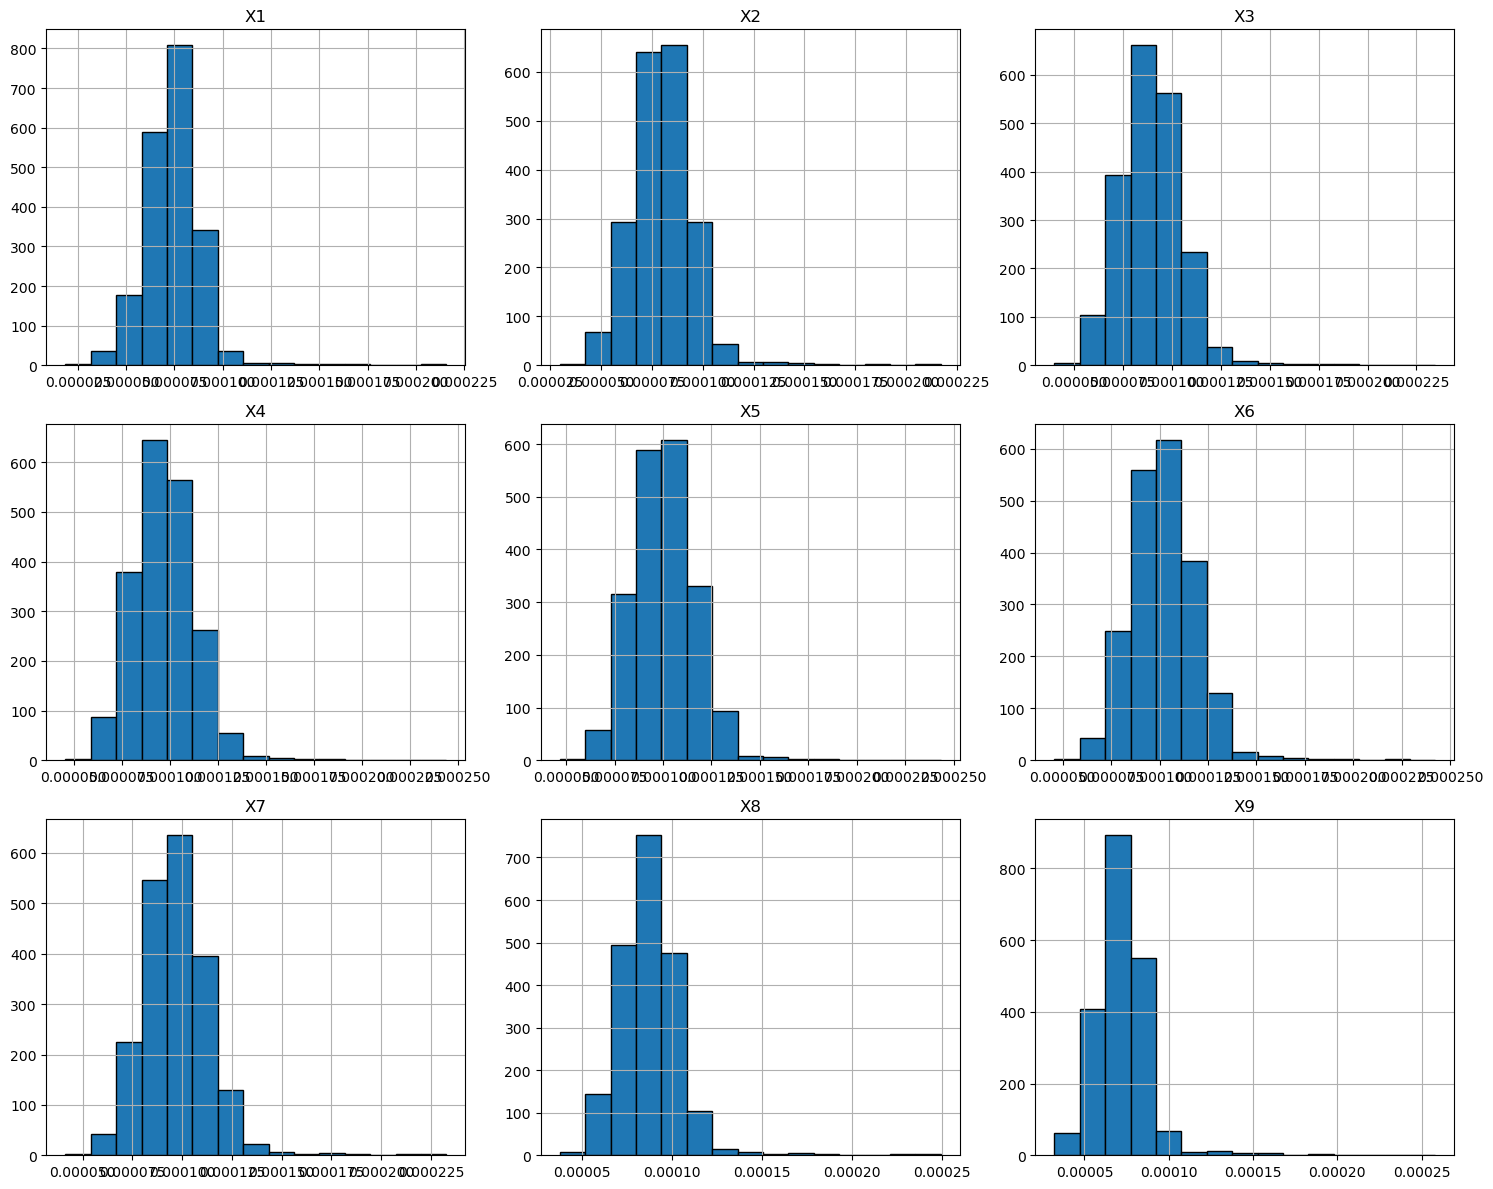

In [21]:
# Select the first 9 columns
columns_to_plot = dataset.columns[:9]

# Plot histograms for the selected columns
dataset[columns_to_plot].hist(figsize=(15, 12), bins=15, edgecolor='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

From what we can see here, it appears as if we have a generally consistent bell plot throughout. But we can see that there is quite a bit of a skew to the left, implying that outliers may pose an issue.

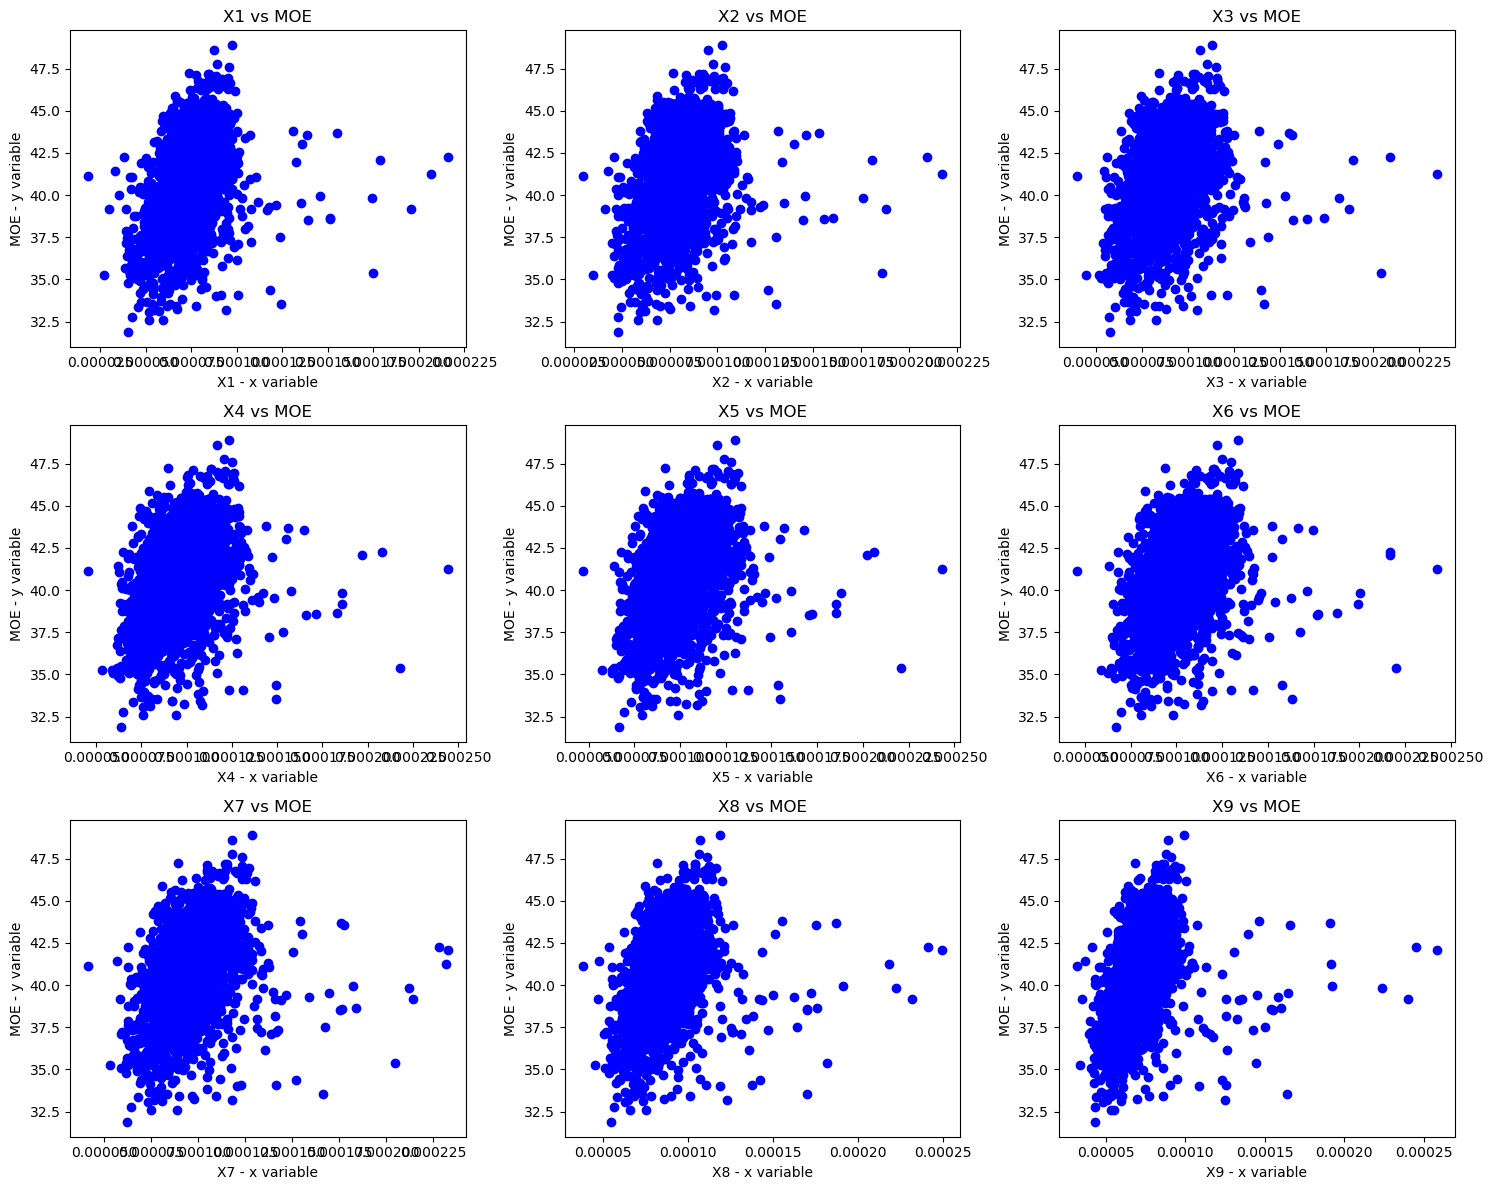

In [24]:
# Select the first 9 columns
columns_to_plot = dataset.columns[:9]

# Create subplots for scatterplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid

# Iterate through the columns and plot scatterplots
for i, col in enumerate(columns_to_plot):
    row, col_idx = divmod(i, 3)  # Determine the subplot position (row, column)
    axes[row, col_idx].scatter(dataset[col].abs(), dataset['MOE'].abs(), color='blue', marker='o')
    axes[row, col_idx].set_title(f'{col} vs MOE')
    axes[row, col_idx].set_xlabel(f'{col} - x variable')
    axes[row, col_idx].set_ylabel('MOE - y variable')

# Adjust layout
plt.tight_layout()
plt.show()


To furhter the suspicions, it does appear that outliers shall be an issue in this assessment. A majority of the data appears to be concentrated in a pattern that would benefit from PCA to better assess the data with variance directionality accounted for.

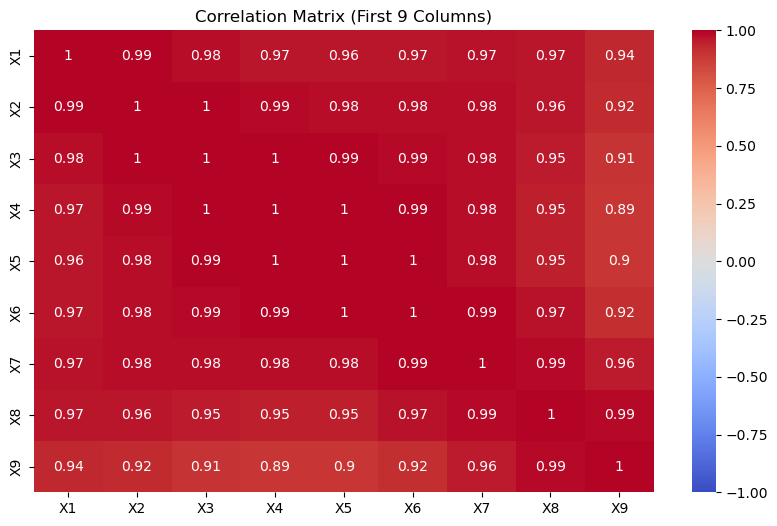

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Replace '#DIV/0!' with NaN and process numeric data
dataset = dataset.replace('#DIV/0!', np.nan)

# Select numeric columns and convert to numeric, handling errors and NaNs
numeric_df = dataset.select_dtypes(include=[np.number, bool])
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')
numeric_df = numeric_df.fillna(0)

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Select only the first 9 columns for visualization
subset_corr_matrix = corr_matrix.iloc[:9, :9]

# Plot the subset correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix (First 9 Columns)')
plt.show()


In [29]:
# Assuming 'y' is the target column
correlation_with_y = dataset.corr()['MOE'][:-1]  # Exclude 'y' itself
print(correlation_with_y)

X1      0.360060
X2      0.353004
X3      0.340380
X4      0.338320
X5      0.345779
          ...   
X688   -0.517350
X689   -0.497237
X690   -0.469014
X691   -0.430431
X692   -0.387073
Name: MOE, Length: 692, dtype: float64


In [35]:
corr_matrix["MOE"].sort_values(ascending=False)

MOE     1.000000
X205    0.614250
X94     0.611595
X142    0.609129
X95     0.608722
          ...   
X221   -0.686290
X220   -0.704561
X217   -0.707314
X218   -0.731446
X219   -0.733180
Name: MOE, Length: 693, dtype: float64

As the vast amount of data would create a computationally and long assessment of any correlations, this study assessed the first 9 columns. It appears that each of them in the correlation matrix appear to have strong correlations with y. On the other hand, in sorting and assessing the list of correlations, it appears as if they are not as strong as the matrix has implied with values ranging from -.733 to .614 (still somewhat strong but not perfectly linear or negatively linear). 

## 3. Data Preprocessing

### 3.1 Splitting the Dataset to the Testing and Training Set

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

When processing the dataset, we need to split the data into a test set and training set. The training set, usually 80% of the data is used to generate the model(s). The test set on the other hand is about 20%, and used to validate the model(s) for accuracy. 

In [38]:
X_train.shape

(1614, 692)

In [39]:
X_test.shape

(404, 692)

Here we have split the training data to 1614 datapoints and the testing data with 404.

### 3.2 Scaling the Features

In [40]:
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()

X_train = scx.fit_transform(X_train)
X_test = scx.transform(X_test)

#y_train = scy.fit_transform((y_train).reshape(-1,1))
#y_test = scy.transform((y_test).reshape(-1,1))

Scaling is furhter necessary so as to compare features more easily. Ie. it is easier to compare an a large X1 with a small X2 when we reduce them to more similar values. This method above uses standard scaling, which uses a Z-score normalization to scale. 

This assessment chose not to scale the y output as there is not much for variability in the dataset.

### 3.3 Cleaning the Code

First in handling the missing training feature data, we will use imputation using the mean to fill in missing data.

In [42]:
from sklearn.impute import SimpleImputer

# Impute using the mean
mean_imputer = SimpleImputer(strategy='mean')
X_train = mean_imputer.fit_transform(X_train)

In [44]:
X_train.shape

(1614, 692)

It doesnt appear as if data was missing, so handling for the y is not needed.

Finally, in handling outliers in the dataset.

In [46]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Assuming X_train and y_train are your dataset features and target variable
X_train = pd.DataFrame(X_train)  # Convert to DataFrame if it's not already

# Step 1: Initialize the Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(contamination=0.01)

# Step 2: Fit the model and predict outliers for all columns
yhat = lof.fit_predict(X_train)

# Step 3: Create a boolean mask to filter inliers
mask = (yhat != -1)

# Step 4: Apply the mask to remove outliers from both features (X) and target (y)
X_train_clean = X_train[mask]

# Step 5: Print the shape of the cleaned dataset (without outliers)
print(f"Shape of X_train before removing outliers: {X_train.shape}")
print(f"Shape of X_train after removing outliers: {X_train_clean.shape}")

# Display the cleaned data
X_train_clean.head()


Shape of X_train before removing outliers: (1614, 692)
Shape of X_train after removing outliers: (1597, 692)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691
0,0.497643,0.523192,0.566185,0.537184,0.572500,0.556977,0.554536,0.552480,0.427265,0.313364,0.190519,0.023473,-0.096775,-0.080023,0.123721,0.272544,0.367068,0.449944,0.526554,0.569866,0.506811,0.393845,0.071481,-0.743556,-1.223191,-1.135062,-1.027907,-0.874468,-0.807452,-0.678923,-0.592065,-0.365248,0.013620,0.665910,0.693786,0.486095,0.332464,0.214509,0.065335,-0.004977,-0.056698,-0.089920,-0.138812,-0.149763,-0.124895,-0.102435,-0.052526,-0.007170,0.011235,-0.001898,-0.152176,-0.292201,-0.360671,-0.475553,-0.567368,-0.694592,-0.736679,-0.614224,-0.691899,-0.778101,-0.691142,-0.799420,-0.846115,-0.755721,-0.372007,0.050789,0.267294,0.394489,0.501134,0.403170,0.281603,0.275325,0.378680,0.310673,0.269050,0.363168,0.514445,0.062646,-0.621085,-0.731495,-0.711608,-0.844438,-1.015084,-0.992621,-1.047488,-1.144440,-0.828851,-0.481645,0.523623,1.017076,0.857097,0.964581,0.884487,0.785861,0.833847,0.771927,0.758592,0.728037,0.679074,0.845376,0.821369,0.783641,0.758619,0.678313,0.670117,0.662448,0.705699,0.758380,0.695555,0.698006,0.644274,0.591400,0.504054,0.335412,0.142929,-0.151639,-0.543352,-0.809574,-1.027492,-1.201740,-1.259007,-1.305148,-1.301560,-0.417481,0.569078,0.800889,0.837218,0.794869,0.681027,0.409141,-0.151491,-1.021546,-1.252587,-1.100850,-0.691616,0.487331,1.075487,1.172681,1.185132,1.097178,0.857626,0.593381,0

In [49]:
# Align y_test with the dropped rows in X_test
y_train_clean = y_train[X_train_clean.index]


In [50]:
y_train_clean.shape

(1597,)

We can see taht we have successfully removed about 17 rows of outliers.

In [52]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd

# Assuming X_train and y_train are your dataset features and target variable
X_test = pd.DataFrame(X_test)  # Convert to DataFrame if it's not already

# Step 1: Initialize the Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(contamination=0.01)

# Step 2: Fit the model and predict outliers for all columns
yhat = lof.fit_predict(X_test)

# Step 3: Create a boolean mask to filter inliers
mask = (yhat != -1)

# Step 4: Apply the mask to remove outliers from both features (X) and target (y)
X_test_clean = X_test[mask]

# Step 5: Print the shape of the cleaned dataset (without outliers)
print(f"Shape of X_train before removing outliers: {X_test.shape}")
print(f"Shape of X_train after removing outliers: {X_test_clean.shape}")

# Display the cleaned data
X_test_clean.head()

y_test_clean = y_test[X_test_clean.index]

Shape of X_train before removing outliers: (404, 692)
Shape of X_train after removing outliers: (399, 692)


In [53]:
y_test_clean.shape

(399,)

Appears that some outliers existed in the test data as well. We shall remove as well.

In [55]:
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the scaler on the cleaned training data
scaler = StandardScaler().fit(X_train_clean)

# Step 2: Transform both training and test datasets using the fitted scaler
X_train_clean = scaler.transform(X_train_clean)
X_test_clean = scaler.transform(X_test_clean)

## 4. Basic Machine Learning Models (No PCA)

For the basic machine learning models, we will be performing the regression analysis using 1) simple linear regression, 2) polynomial regression, and 3) support vector regression (SVR). Simple linear regression essentially creates a line to approximate the data patterns, while polynomial regression uses a more complex polynomial line to approximate. SVR implements a more robust analysis using an error margin to better approximate a linear function through the data.

### 4.1 Linear Regression

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Assuming scy is your StandardScaler for y values
scy = StandardScaler().fit(y_train_clean.reshape(-1, 1))  # Reshape y_train_clean to a 2D array for fitting

# Generate Model
regressor = LinearRegression()
regressor.fit(X_train_clean, y_train_clean)

# Predict on both the training and test sets
y_train_pred_lr = regressor.predict(X_train_clean)
y_test_pred_lr = regressor.predict(X_test_clean)

# Calculate R2 score for training and test data
train_r2_lr = r2_score(y_train_clean, y_train_pred_lr)
test_r2_lr = r2_score(y_test_clean, y_test_pred_lr)

# Print R2 scores for Linear Regression
print(f"Linear Regression - Training R2 Score: {train_r2_lr}")
print(f"Linear Regression - Test R2 Score: {test_r2_lr}")

# Now fit the scaler to the test set
scy.fit(y_test_clean.reshape(-1, 1))

# Error for Linear Regression
Actual_L =scy.inverse_transform(y_test_clean.reshape(-1, 1))  # Reshape y_test_clean for inverse transform
Predicted_L = scy.inverse_transform(y_test_pred_lr.reshape(-1, 1))  # Reshape y_test_pred_lr for inverse transform
Error_L = Predicted_L - Actual_L

print(f"Error (Predicted - Actual): {Error_L}")


Linear Regression - Training R2 Score: 0.8239433225744605
Linear Regression - Test R2 Score: 0.48059056491589724
Error (Predicted - Actual): [[ -3.86751074]
 [-10.42808398]
 [  3.89989574]
 [  4.52159451]
 [  4.56054655]
 [  0.59033299]
 [ -1.12656996]
 [ -8.99652241]
 [ 11.47935924]
 [  7.04269037]
 [  2.39322433]
 [ -7.27973493]
 [ -4.1672303 ]
 [  6.92390389]
 [  1.49658862]
 [ -4.58630729]
 [  8.07884699]
 [  4.47488438]
 [-11.4767811 ]
 [ -3.7237088 ]
 [ -5.2952328 ]
 [  0.94369594]
 [-14.14656846]
 [ -4.30660214]
 [ -1.85676227]
 [  2.15286779]
 [ -3.66783861]
 [  3.28224015]
 [ -4.8722016 ]
 [  3.68663779]
 [  9.17160989]
 [ -6.44298019]
 [ -0.34514293]
 [ -0.19909143]
 [ -3.70646103]
 [  6.74104994]
 [ -1.69919502]
 [  0.51306793]
 [  0.69244608]
 [-11.3842789 ]
 [ -4.38696173]
 [ -0.35823773]
 [  0.92991629]
 [ -0.89595534]
 [  0.29340699]
 [ -8.25663072]
 [ -4.12556439]
 [-11.68852684]
 [ -6.93115392]
 [  1.398614  ]
 [ -1.83709681]
 [  2.26041683]
 [  2.11132139]
 [ -0.28278

Here we see a high training R2 value of 82% whith a low testing R2 value.

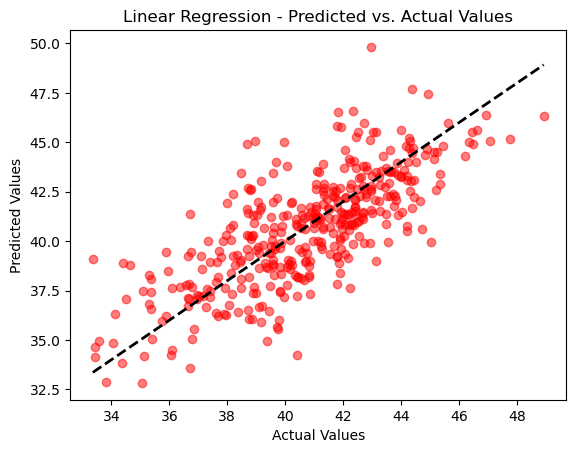

In [59]:
plt.scatter(y_test_clean, y_test_pred_lr, color='red', alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Predicted vs. Actual Values')
plt.show()

It apepears that there is relative consistency between prediced and actual values for the linear.

### 4.2 Polynomial Regression

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Use PolynomialFeatures to create polynomial terms
poly_features = PolynomialFeatures(degree=2) #----------------------------------------------change for better accuracy

# Transform the original X_train and X_test data
X_train_poly = poly_features.fit_transform(X_train_clean)
X_test_poly = poly_features.transform(X_test_clean)

# Fit Linear Regression on the polynomial features
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train_clean)

# Predict on both the training and test sets for Polynomial Regression
y_train_pred_poly = poly_regressor.predict(X_train_poly)
y_test_pred_poly = poly_regressor.predict(X_test_poly)

# Calculate R2 score for training and test data for Polynomial Regression
train_r2_poly = r2_score(y_train_clean, y_train_pred_poly)
test_r2_poly = r2_score(y_test_clean, y_test_pred_poly)

# Print R2 scores for Polynomial Regression
print(f"\n\nPolynomial Regression - Training R2 Score: {train_r2_poly}")
print(f"Polynomial Regression - Test R2 Score: {test_r2_poly}")

# Error for Polynomial Regression
Actual_PR =scy.inverse_transform(y_test_clean.reshape(-1, 1))
Predicted_PR = scy.inverse_transform(y_test_pred_poly.reshape(-1, 1))
Error_PR = Predicted_PR - Actual_PR



Polynomial Regression - Training R2 Score: 0.9987368917551142
Polynomial Regression - Test R2 Score: -1.451635021577469e+21


Here we try a 2nd degree polynomial assessment to better review the data. We find that there appears to be good training with the training data but poor with the test.

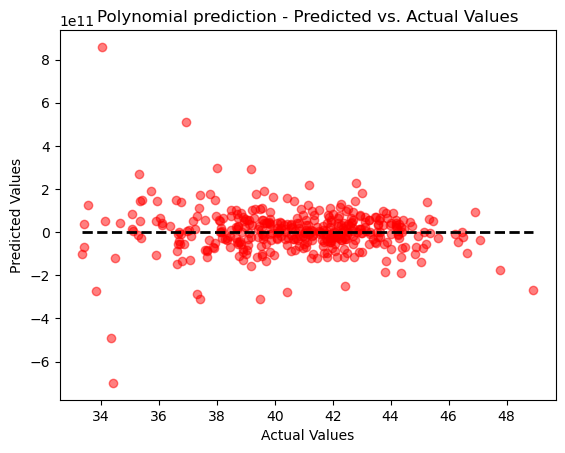

In [62]:
plt.scatter(y_test_clean, y_test_pred_poly, color='red', alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial prediction - Predicted vs. Actual Values')
plt.show()

It does appear that there si fairly good fitment for the R2 value of the polynomial. 

### 4.3 Support Vector Regression (SVR)

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Initialize SVR with RBF kernel
svr = SVR(kernel='rbf')

# Fit the SVR model
svr.fit(X_train_clean, y_train_clean)

# Predict on both the training and test sets for SVR
y_train_pred_svr = svr.predict(X_train_clean)
y_test_pred_svr = svr.predict(X_test_clean)

# Calculate R2 score for training and test data for SVR
train_r2_svr = r2_score(y_train_clean, y_train_pred_svr)
test_r2_svr = r2_score(y_test_clean, y_test_pred_svr)

# Print R2 scores for SVR
print(f"\n\nSupport Vector Regression (SVR) - Training R2 Score: {train_r2_svr}")
print(f"Support Vector Regression (SVR) - Test R2 Score: {test_r2_svr}")

# Error for SVR
Actual_SVR =scy.inverse_transform(y_test_clean.reshape(-1, 1))
Predicted_SVR = scy.inverse_transform(y_test_pred_svr.reshape(-1, 1))
Error_SVR = Predicted_SVR - Actual_SVR



Support Vector Regression (SVR) - Training R2 Score: 0.696830713762456
Support Vector Regression (SVR) - Test R2 Score: 0.6773712286162643


With implementing SVR, it appears that the R2 values trend to have slightly lower correlations.

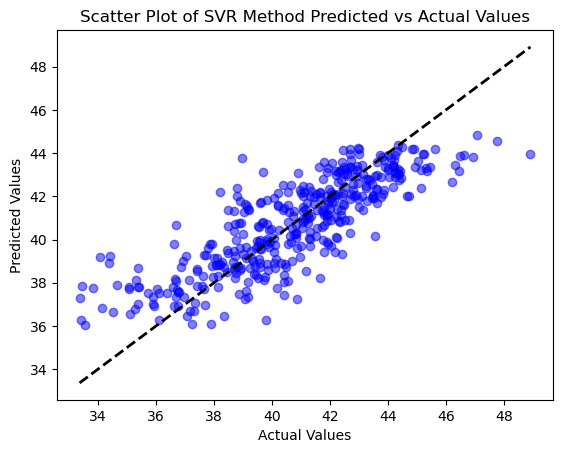

In [64]:
plt.scatter(y_test_clean, y_test_pred_svr, color='blue', alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of SVR Method Predicted vs Actual Values')
plt.show()

looking at the SVR, the predicted vs the actual values appear to have fairly decent consistency.

## 5. ANN Model Implementation (No PCA)

Now to approach creating a model using artificial nerual networks. We will go through initializing the ANN, building input, hidden, and output layers.

### 5.1 Initializing the ANN Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model, create the hidden layers
ANN_regressor_model = Sequential()
ANN_regressor_model.add(Dense(16, activation='relu'))  # 1st hidden layer with 16 nodes
ANN_regressor_model.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 nodes
ANN_regressor_model.add(Dense(1))  # Output layer for regression (1 node)

Here we generated a deep ANN, which consists of multiple hidden layers and using a relu activation function for the hidden layers. This should grant us more accuracy in the result.

### 5.2 Compiling the Model

In [67]:
ANN_regressor_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Here we are using an adam optimizer, and other features to compile through this ANN. 

### 5.3 Implementing the Training Data

Next, we use our training data to generate the model. Batch size would determine how many samples are in each training iteration, epochs refer to the number of iterations. Verbose will leave us with no output shown during training

In [68]:
history = ANN_regressor_model.fit(X_train_clean, y_train_clean, epochs=100, batch_size=32, verbose=0)

In [69]:
print(history.history.keys())

dict_keys(['loss', 'mae'])


### 5.4 Testing the Data

Here we can validate the y values for our ANN regression model.

In [70]:
y_train_pred_ANN = ANN_regressor_model.predict(X_train_clean)
y_test_pred_ANN = ANN_regressor_model.predict(X_test_clean)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


### 5.5 ANN Results

Assessing the loss values as we increase in epochs.

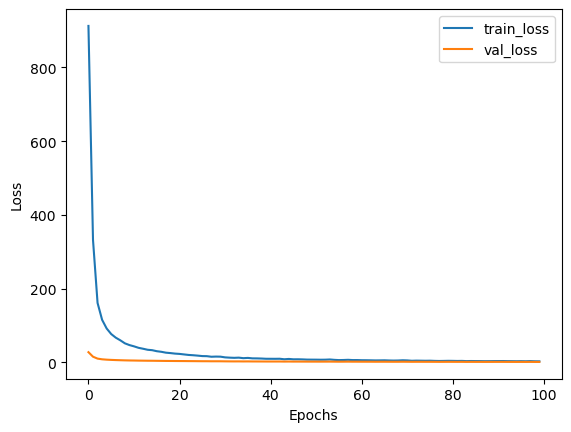

In [72]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['mae'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
train_r2_ANN = r2_score(y_train_clean, y_train_pred_ANN)
test_r2_ANN = r2_score(y_test_clean, y_test_pred_ANN)
print(f"\n\nArtificial Neural Network - Training R2 Score:: {train_r2_ANN}")
print(f"\n\nArtificial Neural Network - Testing R2 Score:: {test_r2_ANN}")

# Error for ANN
Actual_ANN =scy.inverse_transform(y_test_clean.reshape(-1, 1))
Predicted_ANN = scy.inverse_transform(y_test_pred_ANN.reshape(-1, 1))
Error_ANN = Predicted_ANN - Actual_ANN



Artificial Neural Network - Training R2 Score:: 0.6866821850282386


Artificial Neural Network - Testing R2 Score:: -0.5657069255583733


It appears as that the ANN does have some lower accuracies applied with the dataset.

## 6. PCA Dimensionality Reduction

### 6.1 Manual PCA

In [76]:
np.var(X_train_clean[:,0])

0.9999999999999989

Implementing the manual PCA, it does appear that there is a fairly high vvariance beforehand.

### 6.2 Implement PCA

In [77]:
from sklearn.decomposition import PCA

PrinCom = PCA(n_components = 15) # choose the number of PCs
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train_clean)
Z_test = PrinCom.transform(X_test_clean)

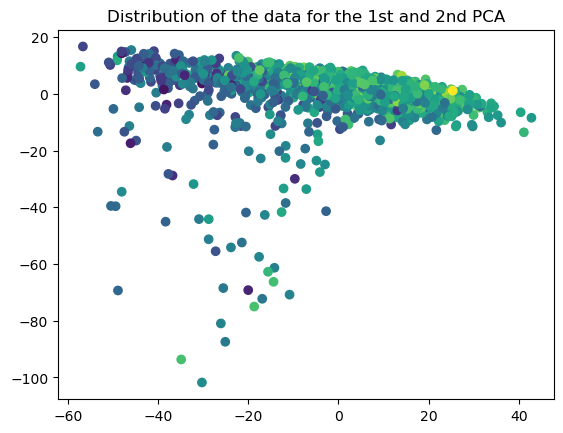

In [78]:
plt.scatter(Z_train[:,0],Z_train[:,1],c=y_train_clean) 
plt.title("Distribution of the data for the 1st and 2nd PCA")
plt.show()

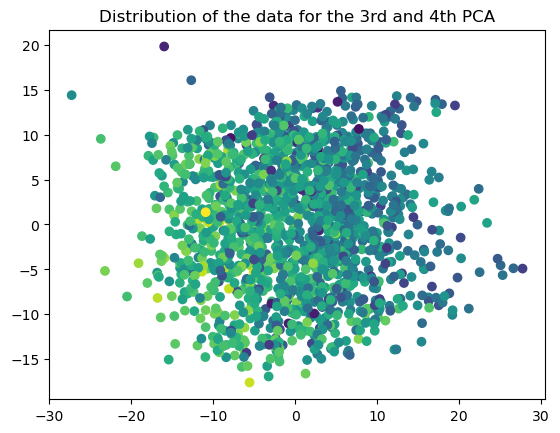

In [79]:
plt.scatter(Z_train[:,2],Z_train[:,3],c=y_train_clean) 
plt.title("Distribution of the data for the 3rd and 4th PCA")
plt.show()

It appears as if this plot for the 3rd and 4th PCAs have some consistencies within. The first two appear to have some linear correlations between them.

### 6.3 Check Contributions

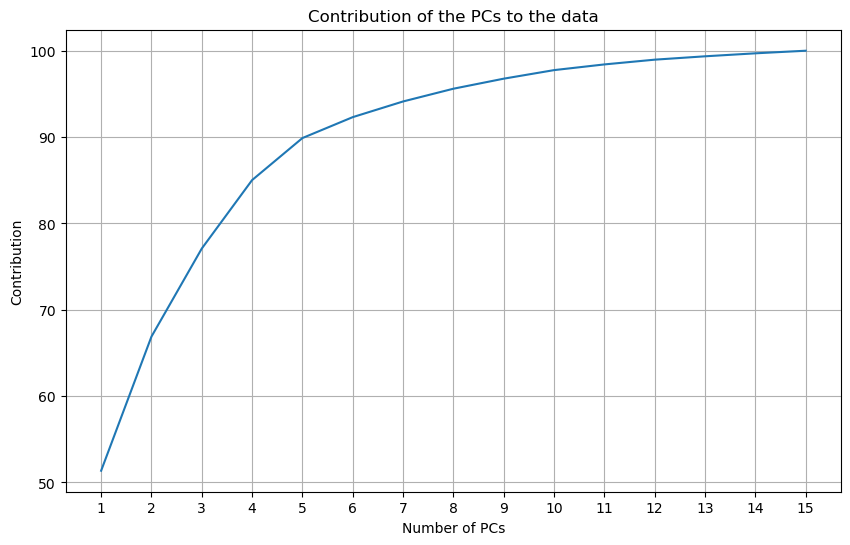

In [83]:
e = []
for z in Z_train.T:
  e.append(np.var(z))

contributions = []
for i in range(Z_train.shape[1]):
  contributions.append(np.sum(e[:i+1]) / np.sum(e))

plt.figure(figsize=(10,6))
plt.plot(list(range(1, 16)), [i*100 for i in contributions])
plt.title("Contribution of the PCs to the data")
plt.xlabel("Number of PCs")
plt.ylabel("Contribution")
plt.grid()
plt.xticks(list(range(1,16)))
plt.show()

It appears with the first 8 PCs, we have 95% of the contributions handled. So we shall continue with such.

In [84]:
pd.DataFrame(Z_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03
mean,-3.915326e-15,-1.779694e-17,1.815288e-15,1.744100e-15,-4.600508e-15,-1.477146e-15,3.586083e-15,-1.281380e-14,-7.359034e-15,2.447079e-15,-7.324552e-15,-2.965415e-15,-1.109862e-14,2.302479e-15,4.259030e-15
std,1.823898e+01,1.003075e+01,8.127538e+00,7.166790e+00,5.614994e+00,3.961273e+00,3.428632e+00,3.092705e+00,2.744223e+00,2.533721e+00,2.067306e+00,1.888567e+00,1.588049e+00,1.495947e+00,1.396683e+00
min,-5.722677e+01,-1.017740e+02,-2.725124e+01,-1.758890e+01,-3.194430e+01,-2.080030e+01,-1.390830e+01,-1.035570e+01,-1.154345e+01,-1.326592e+01,-1.154752e+01,-7.657832e+00,-1.430454e+01,-1.064794e+01,-8.430151e+00
25%,-8.949177e+00,-1.765923e+00,-5.859826e+00,-5.319388e+00,-2.525005e+00,-2.526412e+00,-2.172143e+00,-1.997029e+00,-1.706808e+00,-1.674241e+00,-1.233691e+00,-1.259839e+00,-9.297330e-01,-9.777763e-01,-8.336383e-01
50%,3.543709e+00,1.271130e+00,3.988089e-02,3.683426e-01,5.535364e-01,1.446012e-01,-7.868816e-02,-7.548119e-02,3.734494e-02,-3.694679e-02,-7.925488e-03,-4.818504e-02,-4.318174e-03,-4.526358e-02,2.543590e-02
75%,1.291859e+01,4.309605e+00,5.651175e+00,5.753613e+00,3.306395e+00,2.540656e+00,2.243943e+00,1.662464e+00,1.894224e+00,1.717235e+00,1.279252e+00,1.228331e+00,9.062428e-01,9.482941e-01,8.540049e-01
max,4.279872e+01,1.669490e+01,2.773163e+01,1.981468e+01,1.925027e+01,1.958941e+01,1.106709e+01,1.314039e+01,7.970857e+00,8.274099e+00,1.061939e+01,1.134762e+01,6.497418e+00,7.090725e+00,5.610651e+00


In [86]:
# The first Several PCs are taken as input to the model

sc2 = StandardScaler()
Z_train_scaled = sc2.fit_transform(Z_train)
Z_test_scaled = sc2.transform(Z_test)

Z_train_clean = Z_train_scaled[:, 0:8]
Z_test_clean = Z_train_scaled[:, 0:8]

Here we have recreated the test and training sets using the first 8 PCAs.

In [87]:
np.var(Z_train_scaled [:,0])

1.0

The variance here we see has increased to 1, meaning very low if any.

## 7. PCA Implementation to Basic Machine Learning Models

Now that PCA has been implemented and we have observed the impact to the data, we can reimplement them into our models with our transformed datasets. 

### 7.1 Linear Regression with PCA

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate Model
regressor_PCA = LinearRegression()
regressor_PCA.fit(Z_train_clean, y_train_clean)

# Predict on both the training and test sets
y_train_pred_lr_PCA = regressor_PCA.predict(Z_train_clean)
y_test_pred_lr_PCA = regressor_PCA.predict(Z_test_clean)

# Calculate R2 score for training and test data
train_r2_lr_PCA = r2_score(y_train_clean, y_train_pred_lr)
test_r2_lr_PCA = r2_score(y_test_clean, y_test_pred_lr)

# Print R2 scores for Linear Regression
print(f"Linear Regression - Training R2 Score: {train_r2_lr_PCA}")
print(f"Linear Regression - Test R2 Score: {test_r2_lr_PCA}")

# Error for Linear Regression
Actual_L_PCA =scy.inverse_transform(y_test_clean.reshape(-1, 1))
Predicted_L_PCA = scy.inverse_transform(y_test_pred_lr_PCA.reshape(-1, 1))
Error_L_PCA = Predicted_L - Actual_L_PCA

Linear Regression - Training R2 Score: 0.8239433225744605
Linear Regression - Test R2 Score: 0.48059056491589724


Here we find a decent training score for linear, but testingt appears to have overfitting.

ValueError: x and y must be the same size

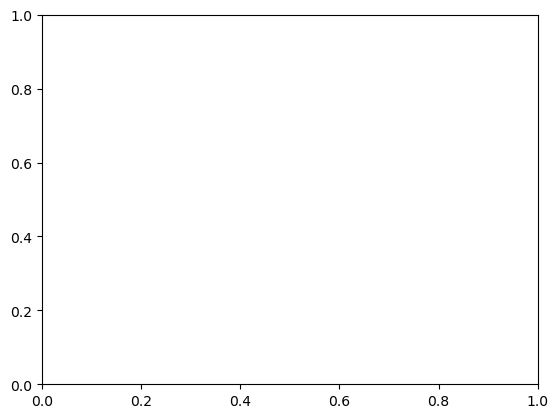

In [91]:
plt.scatter(y_test_clean, y_test_pred_lr_PCA, color='red', alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression - Predicted vs. Actual Values')
plt.show()

tbe-------------------------------------------------

### 7.2 Polynomial Regression with PCA

In [94]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np

# Use PolynomialFeatures to create polynomial terms
poly_features_PCA = PolynomialFeatures(degree=2) #----------------------------------------------change for better accuracy

# Transform the original Z_train and Z_test data
Z_train_poly_PCA = poly_features_PCA.fit_transform(Z_train_clean)
Z_test_poly_PCA = poly_features_PCA.transform(Z_test_clean)

# Fit Linear Regression on the polynomial features
poly_regressor_PCA = LinearRegression()
poly_regressor_PCA.fit(Z_train_poly_PCA, y_train_clean)

# Predict on both the training and test sets for Polynomial Regression
y_train_pred_poly_PCA = poly_regressor_PCA.predict(Z_train_poly_PCA)
y_test_pred_poly_PCA = poly_regressor_PCA.predict(Z_test_poly_PCA)

# Calculate R2 score for training and test data for Polynomial Regression
train_r2_poly_PCA = r2_score(y_train_clean, y_train_pred_poly_PCA)

# Inverse transform y_test_clean to match predictions scale
Actual_PR_PCA = scy.inverse_transform(y_test_clean.reshape(-1, 1))
Predicted_PR_PCA = scy.inverse_transform(y_test_pred_poly_PCA.reshape(-1, 1))

# Calculate R2 score for test data for Polynomial Regression
test_r2_poly_PCA = r2_score(Actual_PR_PCA, Predicted_PR_PCA)

# Print R2 scores for Polynomial Regression
print(f"\n\nPolynomial Regression - Training R2 Score: {train_r2_poly_PCA}")
print(f"Polynomial Regression - Test R2 Score: {test_r2_poly_PCA}")

# Error for Polynomial Regression
Error_PR_PCA = Predicted_PR_PCA - Actual_PR_PCA


ValueError: Found input variables with inconsistent numbers of samples: [399, 1597]

tbd ----------------------------------------

In [ ]:
plt.scatter(y_test_clean, y_test_pred_poly_PCA, color='red', alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial prediction - Predicted vs. Actual Values')
plt.show()

tbd ----------------------------------------

### 7.3 SVR with PCA

In [119]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Initialize SVR with RBF kernel
svr_PCA = SVR(kernel='rbf')

# Fit the SVR model
svr_PCA.fit(Z_train_clean, y_train_clean)

# Predict on both the training and test sets for SVR
y_train_pred_svr_PCA = svr_PCA.predict(Z_train_clean)
y_test_pred_svr_PCA = svr_PCA.predict(Z_test_clean)

# Calculate R2 score for training and test data for SVR
train_r2_svr_PCA = r2_score(y_train_clean, y_train_pred_svr_PCA)

# Check if the dimensions match before calculating R2 score
if len(y_test_clean) != len(y_test_pred_svr_PCA):
    raise ValueError("Mismatch in the number of samples between Actual and Predicted values.")

test_r2_svr_PCA = r2_score(y_test_clean, y_test_pred_svr_PCA)

# Error for SVR
Actual_SVR_PCA = scy.inverse_transform(y_test_clean.reshape(-1, 1))
Predicted_SVR_PCA = scy.inverse_transform(y_test_pred_svr_PCA.reshape(-1, 1))
Error_SVR_PCA = Predicted_SVR_PCA - Actual_SVR_PCA

# Print R2 scores for SVR
print(f"\n\nSupport Vector Regression (SVR) - Training R2 Score: {train_r2_svr_PCA}")
print(f"Support Vector Regression (SVR) - Test R2 Score: {test_r2_svr_PCA}")


ValueError: Mismatch in the number of samples between Actual and Predicted values.

tbd ----------------------------------------

In [ ]:
plt.scatter(y_test_clean, y_test_pred_svr_PCA, color='blue', alpha=0.5)
plt.plot([y_test_clean.min(), y_test_clean.max()], [y_test_clean.min(), y_test_clean.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of SVR Method Predicted vs Actual Values')
plt.show()

tbd ----------------------------------------

## 8. PCA Implementation to ANN

### 8.1 Initializing, Compiling, and Implementing Training Data the ANN Model with PCA

In [96]:
# Define the model, create the hidden layers
ANN_regressor_model_PCA = Sequential()
ANN_regressor_model_PCA.add(Dense(16, activation='relu'))  # 1st hidden layer with 16 nodes
ANN_regressor_model_PCA.add(Dense(32, activation='relu'))  # 2nd hidden layer with 32 nodes
ANN_regressor_model_PCA.add(Dense(1))  # Output layer for regression (1 node)

In [97]:
ANN_regressor_model_PCA.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [98]:
history_PCA = ANN_regressor_model_PCA.fit(Z_train_clean, y_train_clean, epochs=100, batch_size=32, verbose=0)

In [99]:
print(history_PCA.history.keys())

dict_keys(['loss', 'mae'])


tbd---------------------------------

### 8.2 Testing the ANN with PCA and Results

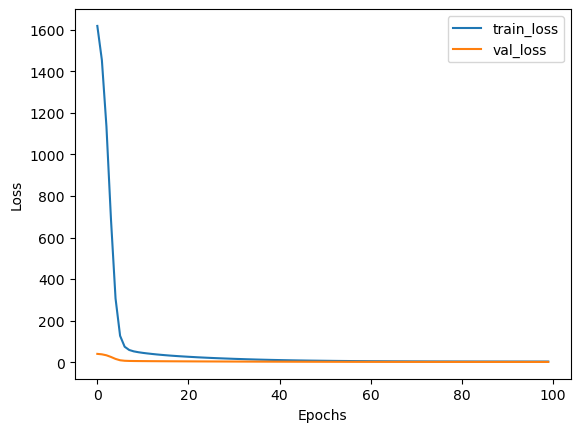

In [100]:
plt.plot(history_PCA.history['loss'], label='train_loss')
plt.plot(history_PCA.history['mae'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here we see the drop over time isnt significant.

In [104]:
y_train_pred_ANN_PCA = ANN_regressor_model_PCA.predict(Z_train_clean)
y_test_pred_ANN_PCA = ANN_regressor_model_PCA.predict(Z_test_clean)

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [107]:
from sklearn.metrics import r2_score

# Inverse transform y_test_clean to match predictions scale
Actual_ANN_PCA = scy.inverse_transform(y_test_clean.reshape(-1, 1))

# Ensure that y_test_pred_ANN_PCA has the same shape as Actual_ANN_PCA
Predicted_ANN_PCA = scy.inverse_transform(y_test_pred_ANN_PCA.reshape(-1, 1))

# Check if the dimensions match before calculating R2 score
if len(Actual_ANN_PCA) != len(Predicted_ANN_PCA):
    raise ValueError("Mismatch in the number of samples between Actual and Predicted values.")

# Calculate R2 score for test data for ANN
test_r2_ANN_PCA = r2_score(Actual_ANN_PCA, Predicted_ANN_PCA)

# Print R2 scores for ANN
print(f"\n\nArtificial Neural Network - Training R2 Score: {train_r2_ANN_PCA}")
print(f"\n\nArtificial Neural Network - Testing R2 Score: {test_r2_ANN_PCA}")

# Error for ANN
Error_ANN_PCA = Predicted_ANN_PCA - Actual_ANN_PCA


ValueError: Mismatch in the number of samples between Actual and Predicted values.

tbd--------------------------------

## 9. Results and Summary of Findings

### 9.1 Non PCA Methods

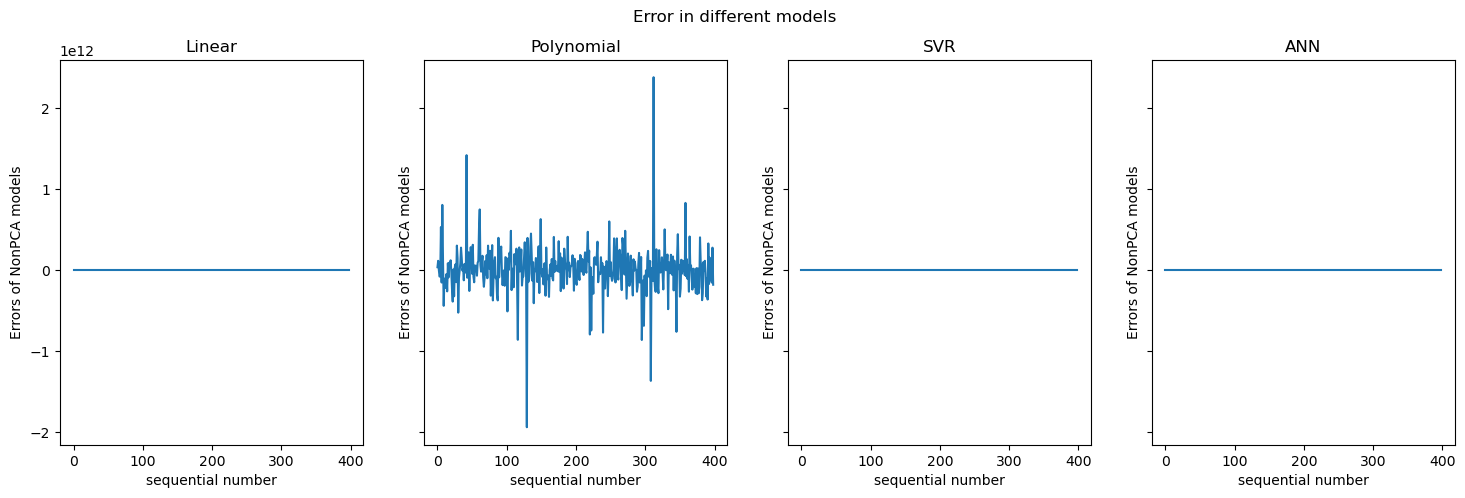

In [109]:
# Non PCA Methods
Error_nonPCA = [Error_L, Error_PR, Error_SVR, Error_ANN]
Methods_nonPCA = ["Linear","Polynomial","SVR","ANN"]

# Creating Error Plots
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error in different models')
for i in range(len(Methods_nonPCA)):
  axs[i].plot(range(len(Error_nonPCA[i])), Error_nonPCA[i])
  axs[i].set_title(Methods_nonPCA[i])

for ax in axs.flat:
    ax.set(xlabel='sequential number', ylabel='Errors of NonPCA models')

tbd-----------------------

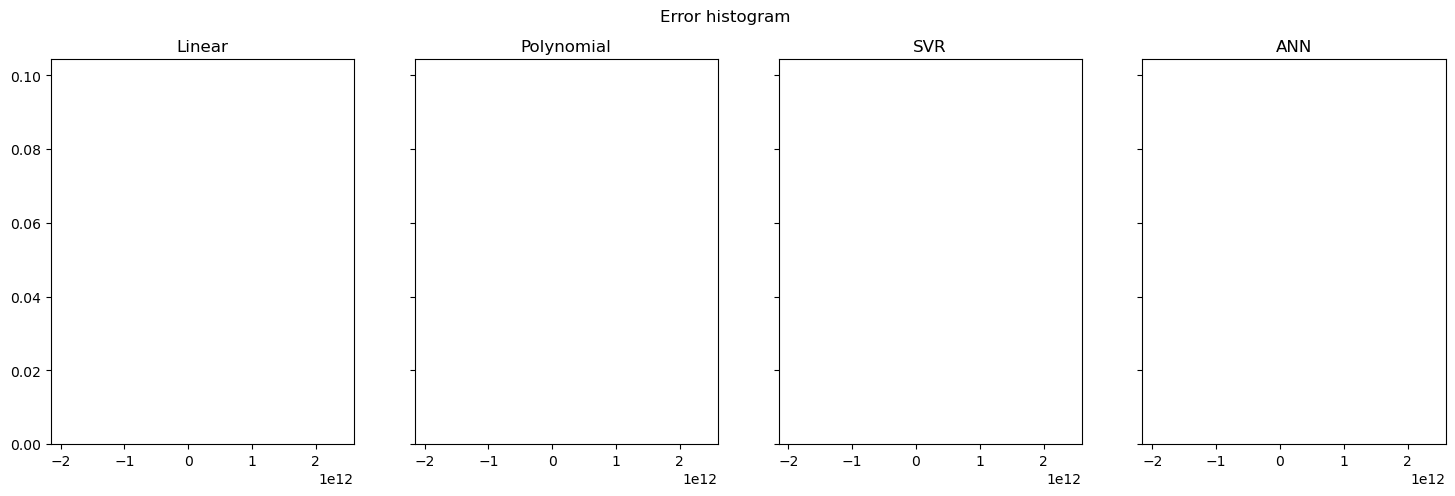

In [110]:
# Illustrating with Histograms
fig, axs = plt.subplots(1, len(Methods_nonPCA), sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error histogram')
for i in range(len(Methods_nonPCA)):
  axs[i].hist(Error_nonPCA[i], 15, density=True)
  axs[i].set_title(Methods_nonPCA[i])
plt.show()

tbd-----------------------

In [111]:
for i in range(len(Error_nonPCA)):
  error_mean_nonPCA[i] = np.average(abs(Error_nonPCA[i]))
  error_std_nonPCA[i] = np.std(np.abs(Error_nonPCA[i]))


#AverageError= np.average(Error_6)
#print('The avergae error is $',AverageError)
print('The average error for nonPCA models is ',error_mean)
print('The std in error for nonPCA models is ',error_std)

NameError: name 'error_mean_nonPCA' is not defined

tbd---------------------------

In [112]:
# Results for nonPCA
R2_nonPCA_train = [train_r2_lr, train_r2_poly, train_r2_svr, train_r2_ANN]
R2_nonPCA_test = [test_r2_lr, test_r2_poly, test_r2_svr, test_r2_ANN]

# Displaying results
for method, r2_train, r2_test in zip(Methods_nonPCA, R2_nonPCA_train, R2_nonPCA_test):
    print(f"{method}: Train R² = {r2_train:.3f}, Test R² = {r2_test:.3f}")

Linear: Train R² = 0.824, Test R² = 0.481
Polynomial: Train R² = 0.999, Test R² = -1451635021577469034496.000
SVR: Train R² = 0.697, Test R² = 0.677
ANN: Train R² = 0.687, Test R² = -0.566


As we can see here, it appears that there may be significant overfitting with the inconsistencies between the testing and training results. The best appears to be polynomial, though more likely it is linear.

### 9.2 PCA Methods

In [113]:
# Non PCA Methods
Error_PCA = [Error_L_PCA, Error_PR_PCA, Error_SVR_PCA, Error_ANN_PCA]
Methods_PCA = ["Linear","Polynomial","SVR","ANN"]

# Creating Error Plots
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error in different models PCA')
for i in range(len(Methods_PCA)):
  axs[i].plot(range(len(Error_PCA[i])), Error_PCA[i])
  axs[i].set_title(Methods_PCA[i])

for ax in axs.flat:
    ax.set(xlabel='sequential number', ylabel='Errors of NonPCA models')

NameError: name 'Error_PR_PCA' is not defined

tbd-----------------------

In [114]:
# Illustrating with Histograms
fig, axs = plt.subplots(1, len(Methods_PCA), sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error histogram PCA')
for i in range(len(Methods_PCA)):
  axs[i].hist(Error_nonPCA[i], 15, density=True)
  axs[i].set_title(Methods_PCA[i])
plt.show()

NameError: name 'Methods_PCA' is not defined

tbd-----------------------

In [115]:
for i in range(len(Error_nonPCA)):
  error_mean_PCA[i] = np.average(abs(Error_PCA[i]))
  error_std_PCA[i] = np.std(np.abs(Error_PCA[i]))


#AverageError= np.average(Error_6)
#print('The avergae error is $',AverageError)
print('The average error for nonPCA models is ',error_mean)
print('The std in error for nonPCA models is ',error_std)

NameError: name 'Error_PCA' is not defined

tbd---------------------------

In [120]:
# Results for nonPCA
R2_PCA_train = [train_r2_lr_PCA, train_r2_poly_PCA, train_r2_svr_PCA, train_r2_ANN_PCA]
R2_PCA_test = [test_r2_lr_PCA, test_r2_poly_PCA, test_r2_svr_PCA, test_r2_ANN_PCA]

# Displaying results
for method, r2_train, r2_test in zip(Methods_PCA, R2_PCA_train, R2_PCA_test):
    print(f"{method}: Train R² = {r2_train:.3f}, Test R² = {r2_test:.3f}")

NameError: name 'test_r2_poly_PCA' is not defined

tbd - some discription about PCAs used

## 10. Conclusion

In the end, it appears that there was a shaping error that has propagated through the code. As was able to be observed on the non-PCA side, we have some poor fitment with the datasets in the testing. With regards to the training values, we do find some higher correlation values with the linear and polynomial regressions, though polynomial is likely due to overfitting. 

In the end, it can still be recommended that MOE be assessed, though the best method can be better determined with fully funcitonal code.